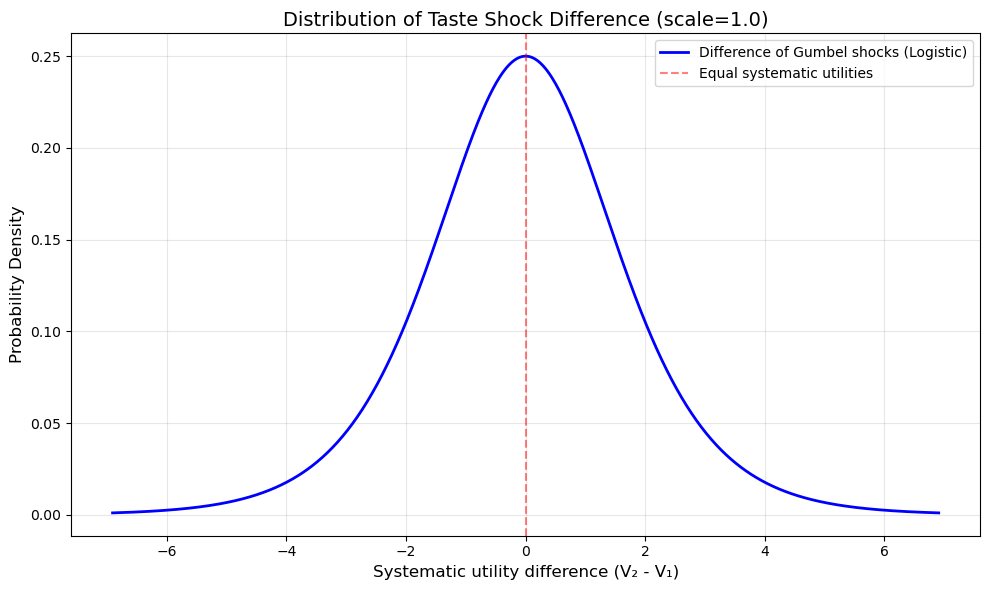


Discrete Choice Model with Gumbel(scale=1.0) taste shocks
How large must the systematic utility difference be such that
the agent still chooses the lower value with x% probability?

With 20% probability, a shock can overcome a difference of 1.3863
With 10% probability, a shock can overcome a difference of 2.1972
With  5% probability, a shock can overcome a difference of 2.9444
With  1% probability, a shock can overcome a difference of 4.5951


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ============================================
# DECLARATIVE PARAMETERS
# ============================================
scale = 1.0    # Scale parameter of Gumbel shocks
# ============================================

# The difference of two i.i.d. Gumbel(0, scale) is Logistic(0, scale)
logistic = stats.logistic(loc=0, scale=scale)

# Generate x values for plotting
x = np.linspace(logistic.ppf(0.001), logistic.ppf(0.999), 1000)
pdf = logistic.pdf(x)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', linewidth=2, label='Difference of Gumbel shocks (Logistic)')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='Equal systematic utilities')
plt.xlabel('Systematic utility difference (V₂ - V₁)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title(f'Distribution of Taste Shock Difference (scale={scale})', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate thresholds
probabilities = [0.20, 0.10, 0.05, 0.01]

print(f"\nDiscrete Choice Model with Gumbel(scale={scale}) taste shocks")
print("=" * 70)
print("How large must the systematic utility difference be such that")
print("the agent still chooses the lower value with x% probability?\n")

for prob in probabilities:
    # Δ such that P(choose lower value) = prob
    # From logit: prob = 1/(1 + exp(Δ/scale))
    # Solving: Δ = scale × ln((1-prob)/prob)
    delta = scale * np.log((1 - prob) / prob)
    
    print(f"With {int(prob*100):2d}% probability, a shock can overcome a difference of {delta:.4f}")